# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

---
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
author: James Compagno
jupyter: python3
---

In [1]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import plotnine as p9
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

/opt/anaconda3/lib/python3.13/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
#Dummies
penguins = load_penguins()
dat = pd.get_dummies(penguins)
dat = dat.dropna()
dat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

In [3]:
#Prep Data for training
X = dat.drop(columns=['bill_depth_mm'])
y = dat['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [4]:
#Model Storage 
model_library = {}
training_results = []
records = []

In [5]:
#Model 1: Using Other Physical Characteristics  
# bill_length_mm flipper_length_mm	body_mass_g

#Model
cols_Physical = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
model_library["Physical_Characteristics"] = LinearRegression().fit(X_train[cols_Physical], y_train)

#Test
y_pred = model_library["Physical_Characteristics"].predict(X_test[cols_Physical])
mse = mean_squared_error(y_test, y_pred)
records.append({
        "Model": "Physical_Characteristics", "Split": "Test",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_pred)
    })

#Train
y_pred = model_library["Physical_Characteristics"].predict(X_train[cols_Physical])
mse = mean_squared_error(y_train, y_pred)
records.append({
        "Model": "Physical_Characteristics", "Split": "Train",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_pred)
    })

In [6]:
#Model 2: Using Just Species and Island 
#species_Adelie	species_Chinstrap	island_Biscoe	island_Dream	
#Excluding: species_Gentoo and island_Torgersen as reference variables

#Model
cols_Spe_Isl = ['species_Adelie', 'species_Chinstrap', 'island_Biscoe', 'island_Dream']
model_library["Species_Island"] = LinearRegression().fit(X_train[cols_Spe_Isl], y_train)

#Test
y_pred = model_library["Species_Island"].predict(X_test[cols_Spe_Isl])
mse = mean_squared_error(y_test, y_pred)
records.append({
        "Model": "Species_Island", "Split": "Test",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_pred)
    })

#Train
y_pred = model_library["Species_Island"].predict(X_train[cols_Spe_Isl])
mse = mean_squared_error(y_train, y_pred)
records.append({
        "Model": "Species_Island", "Split": "Train",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_pred)
    })

In [7]:
#Model 3: Physical Plus Sex and Species 
# bill_length_mm flipper_length_mm	body_mass_g sex_female species_Adelie	species_Chinstrap
#Excluding: species_Gentoo and island_Torgersen as reference variable

#Model
cols_PhysicalPlus = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Adelie', 'species_Chinstrap', 'sex_female']
model_library["Physical_Plus"] = LinearRegression().fit(X_train[cols_PhysicalPlus], y_train)

#Test
y_pred = model_library["Physical_Plus"].predict(X_test[cols_PhysicalPlus])
mse = mean_squared_error(y_test, y_pred)
records.append({
        "Model": "Physical_Plus", "Split": "Test",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_pred)
    })

#Train
y_pred = model_library["Physical_Plus"].predict(X_train[cols_PhysicalPlus])
mse = mean_squared_error(y_train, y_pred)
records.append({
        "Model": "Physical_Plus", "Split": "Train",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_pred)
    })


In [8]:
#Model 4: Everything 

#Model
model_library["Everything"] = LinearRegression().fit(X_train, y_train)

#Test
y_pred = model_library["Everything"].predict(X_test)
mse = mean_squared_error(y_test, y_pred)
records.append({
        "Model": "Everything", "Split": "Test",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_test, y_pred)
    })

#Train
y_pred = model_library["Everything"].predict(X_train)
mse = mean_squared_error(y_train, y_pred)
records.append({
        "Model": "Everything", "Split": "Train",
        "RMSE": np.sqrt(mse), "MSE": mse, "R2": r2_score(y_train, y_pred)
    })


In [9]:
print(model_library)

{'Physical_Characteristics': LinearRegression(), 'Species_Island': LinearRegression(), 'Physical_Plus': LinearRegression(), 'Everything': LinearRegression()}


In [10]:
print(records)

[{'Model': 'Physical_Characteristics', 'Split': 'Test', 'RMSE': np.float64(1.5109209038864235), 'MSE': 2.282881977800967, 'R2': 0.37898030137288463}, {'Model': 'Physical_Characteristics', 'Split': 'Train', 'RMSE': np.float64(1.558489114996137), 'MSE': 2.4288883215614425, 'R2': 0.3829890204253764}, {'Model': 'Species_Island', 'Split': 'Test', 'RMSE': np.float64(1.06138936523607), 'MSE': 1.1265473846362275, 'R2': 0.6935417055725908}, {'Model': 'Species_Island', 'Split': 'Train', 'RMSE': np.float64(1.1289370097372755), 'MSE': 1.2744987719545413, 'R2': 0.6762388254867182}, {'Model': 'Physical_Plus', 'Split': 'Test', 'RMSE': np.float64(0.7851803442767697), 'MSE': 0.6165081730385867, 'R2': 0.8322893064360787}, {'Model': 'Physical_Plus', 'Split': 'Train', 'RMSE': np.float64(0.7919551621922479), 'MSE': 0.6271929789229498, 'R2': 0.8406740438116163}, {'Model': 'Everything', 'Split': 'Test', 'RMSE': np.float64(0.7839188189261734), 'MSE': 0.6145287146666066, 'R2': 0.8328277848390648}, {'Model': 'E

In [11]:
df = (pd.DataFrame(records)
              .sort_values(["Model","Split"])
              .reset_index(drop=True))
df

,Model,Split,RMSE,MSE,R2
0,Everything,Test,0.783919,0.614529,0.832828
1,Everything,Train,0.780939,0.609866,0.845076
2,Physical_Characteristics,Test,1.510921,2.282882,0.378980
3,Physical_Characteristics,Train,1.558489,2.428888,0.382989
4,Physical_Plus,Test,0.785180,0.616508,0.832289
5,Physical_Plus,Train,0.791955,0.627193,0.840674
6,Species_Island,Test,1.061389,1.126547,0.693542
7,Species_Island,Train,1.128937,1.274499,0.676239


Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Physical_Characteristics was the worst model with the highest RMSE and MSE and loest R2. The Everything model was the best in all categories with Physical_Plus being almost as good

In [ ]:
df = df[["Model", "Split", "R2"]].copy()
df["Split"] = df["Split"].replace({"Train": "Train R2", "Test": "Test R2"})

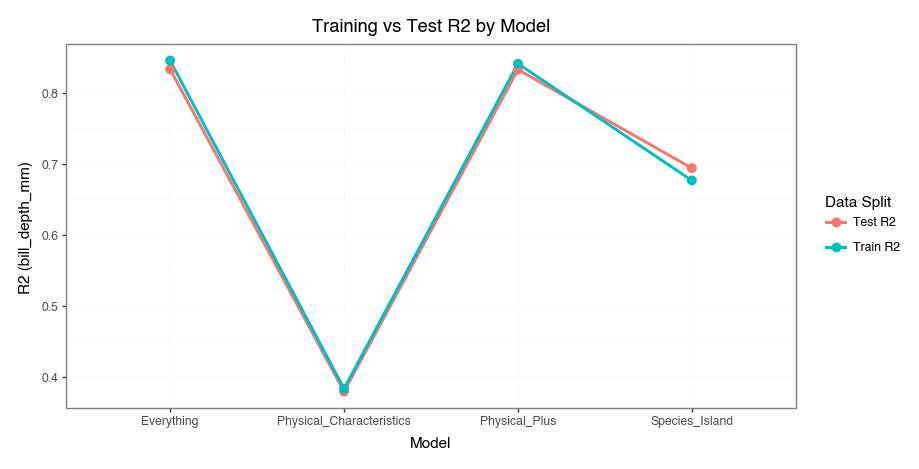

In [24]:
(p9.ggplot(df,
p9.aes(
    x = "Model",
    y = "R2",
    color = "Split",
    group = "Split"
))
+ p9.geom_line(size = 1.2)
+ p9.geom_point(size = 3)
+ p9.labs(
    title = "Training vs Test R2 by Model",
    x = "Model",
    y = "R2 (bill_depth_mm)",
    color = "Data Split"
)
+ p9.theme_bw()
+ p9.theme(
    figure_size = (9, 4.5),
    panel_background = p9.element_rect(fill = "white"),
    panel_grid_major = p9.element_line(color = "#f2f7f8", size = 0.5)
))
